![3D Data Cube](images/poly_reg.webp "Example of 3D Matrix")  


# What is Polynomial Regression

- Polynomial Regression is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial.
- Polynomial Regression models are usually fit with the method of least squares.The least square method minimizes the variance of the coefficients,under the Gauss Markov Theorem.
- Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables.

## Assumptions

- The behavior of a dependent variable can be explained by a linear, or curvilinear, relationship between the dependent variable and a set of k independent variables (xi, i=1 to k).
- The relationship between the dependent variable and any independent variable is linear or curvilinear (specifically polynomial).
- The independent variables are independent of each other.
- The errors are independent, normally distributed with mean zero and a constant variance (OLS).

# How to find the right degree of the equation?

- Forward Selection:
> This method increases the degree until it is significant enough to define the best possible model.
- Backward Selection:
> This method decreases the degree until it is significant enough to define the best possible model.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
data = pd.read_csv("./data/Ice_cream selling data.csv")
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [28]:
data.shape

(49, 2)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [30]:
data.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


# Training

In [31]:
X = data['Temperature (°C)']
y = data['Ice Cream Sales (units)']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

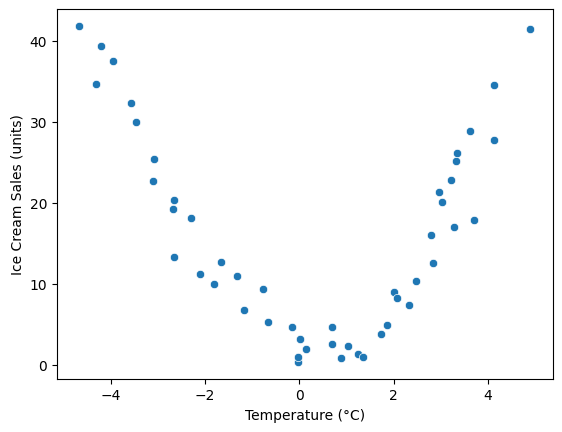

In [33]:
sns.scatterplot(data=data, x=X, y=y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [36]:
y.shape

(49,)

In [37]:
X_train, X_test, y_train, y_test = X_train.to_frame(), X_test.to_frame(), y_train.to_frame(), y_test.to_frame()

## Apply Simple Linear Regression on same Data¶

In [38]:
lr = LinearRegression()
lr = lr.fit(X_train , y_train)

In [39]:
lr.intercept_, lr.coef_

(array([14.81781414]), array([[-0.30883259]]))

In [40]:
Ly_pred = lr.predict(X_test)
lr.score(X_test, y_test)

-0.10321470795210086

In [41]:
# predicted values and mean squared error
mse = mean_squared_error(y_test, Ly_pred)
print(f"\n Mean Squared error: {mse:.2f}")


 Mean Squared error: 252.75


In [42]:
reshape_X = X.values.reshape(-1, 1)

/Users/aayamojha/DWIT-TC/data_science_ml/lesson_3/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


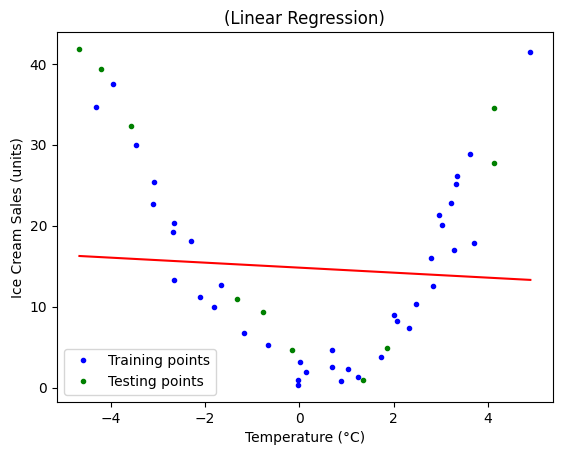

In [43]:
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.plot(X,lr.predict(reshape_X), c="r")
plt.title("(Linear Regression)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()

## Using Ploy Regression

In [64]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)
X_train_poly.shape

(39, 3)

In [65]:
2.959932**2

8.761197444623999

In [66]:
poly_reg.get_feature_names_out()

array(['1', 'Temperature (°C)', 'Temperature (°C)^2'], dtype=object)

In [67]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [68]:
accuracy = model.score(X_test_poly, y_test)
print(f"\nModel R^2 Score: {accuracy:.2f}")


Model R^2 Score: 0.94


In [69]:
# predicted values and mean squared error
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f"\n Mean Squared error: {mse:.2f}")


 Mean Squared error: 12.96


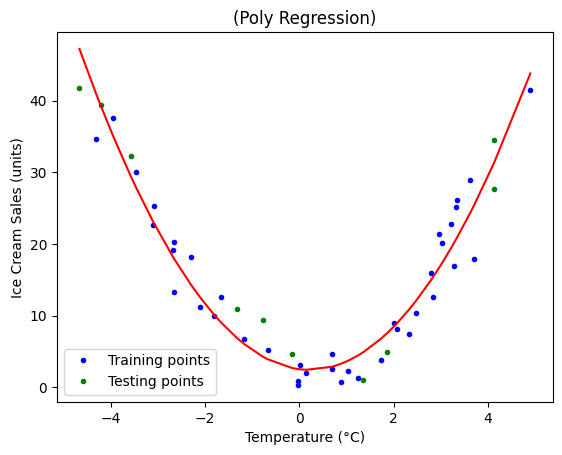

In [70]:
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.plot(X, model.predict(poly_reg.fit_transform(reshape_X)), c="r")
plt.title("(Poly Regression)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()